In [ ]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

from src.reactiv import Stack2reactiv, List2reactiv, reactiv_image

DATA_PATH = Path("/home/cloud-user/work/data/acousur")
year = "2022"
folder_path = DATA_PATH / year

In [19]:
def renormalize_matrix(M,p1,p2):
    """
    Renormalize the values of a matrix between 0 and 1, where 0 corresponds to the 1st percentile
    and 1 corresponds to the 99th percentile.

    Parameters:
    - M: Input matrix.

    Returns:
    - M_normalized: Renormalized matrix.
    """
    # Calcul des percentiles 1 et 99
    percentile_1 = np.percentile(M, p1)
    percentile_2 = np.percentile(M, p2)

    # Renormalisation entre 0 et 1
    M_normalized = (M - percentile_1) / (percentile_2 - percentile_1)

    # Assurer que les valeurs sont limitées entre 0 et 1 (au cas où)
    M_normalized = np.clip(M_normalized, 0, 1)

    return M_normalized

In [8]:
CVHH = np.load(folder_path / "CVHH.npy")
CVVV = np.load(folder_path / "CVVV.npy")

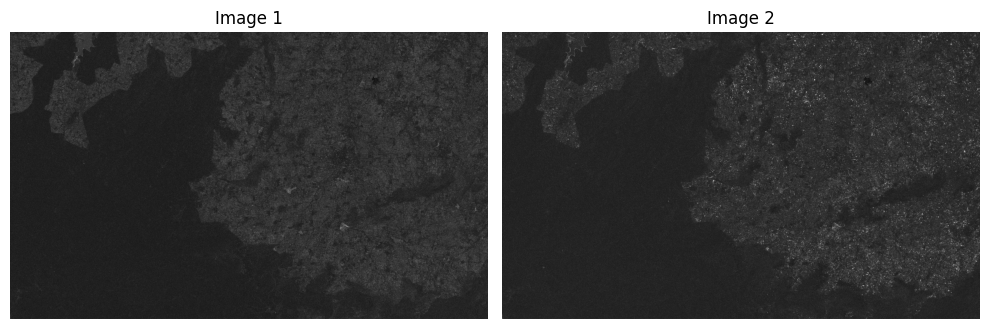

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(CVHH, cmap='gray')  # ou sans cmap si RGB
axs[0].set_title('Image 1')
axs[0].axis('off')

axs[1].imshow(CVVV, cmap='gray')  # ou sans cmap si RGB
axs[1].set_title('Image 2')
axs[1].axis('off')

plt.tight_layout()
plt.show()

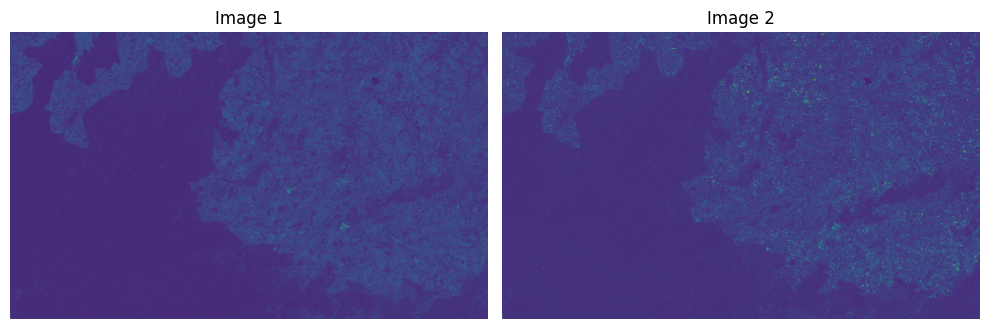

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(CVHH)  # ou sans cmap si RGB
axs[0].set_title('Image 1')
axs[0].axis('off')

axs[1].imshow(CVVV)  # ou sans cmap si RGB
axs[1].set_title('Image 2')
axs[1].axis('off')

plt.tight_layout()
plt.show()

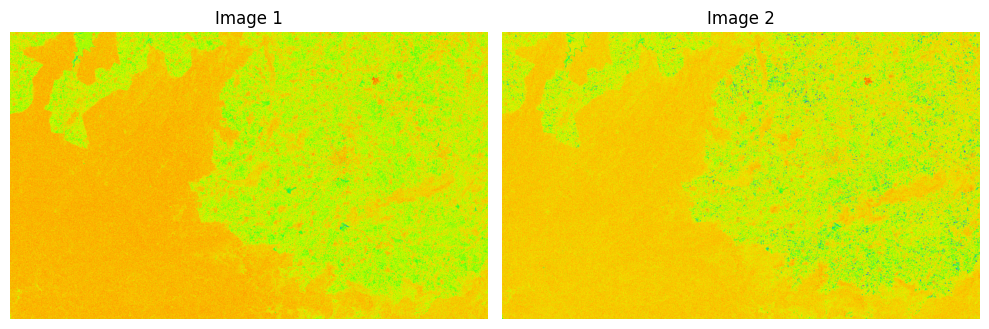

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(CVHH, cmap='hsv')  # ou sans cmap si RGB
axs[0].set_title('Image 1')
axs[0].axis('off')

axs[1].imshow(CVVV, cmap='hsv')  # ou sans cmap si RGB
axs[1].set_title('Image 2')
axs[1].axis('off')

plt.tight_layout()
plt.show()

In [17]:
Lmax3 = np.load(folder_path / "Lmax3.npy")
Lmin3 = np.load(folder_path / "Lmin3.npy")

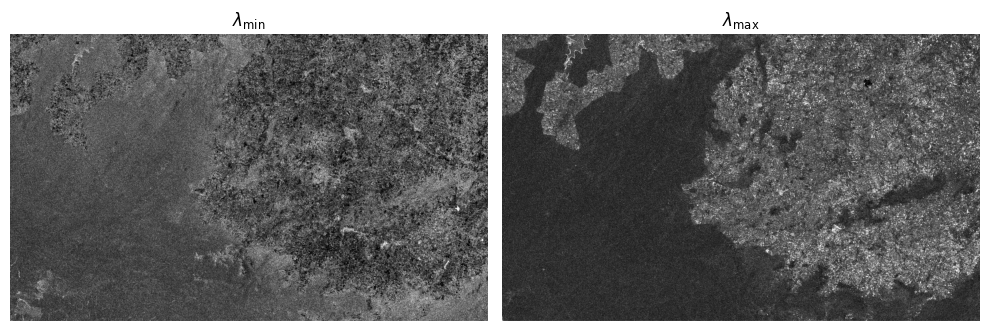

In [20]:
import cv2
# Image dimensions (height, width)
height, width = Lmin3.shape
resize_factor = 3
new_size = (width // resize_factor, height // resize_factor)  # OpenCV: (width, height)

# Resize the images
img_min = renormalize_matrix(Lmin3, 2, 98)
img_max = renormalize_matrix(Lmax3, 2, 98)

img_min_resized = cv2.resize(img_min, new_size, interpolation=cv2.INTER_AREA)
img_max_resized = cv2.resize(img_max, new_size, interpolation=cv2.INTER_AREA)

# Plot
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

axs[0].imshow(img_min_resized, cmap='gray')
axs[0].set_title(r"$\lambda_{\min}$")
axs[0].axis('off')

axs[1].imshow(img_max_resized, cmap='gray')
axs[1].set_title(r"$\lambda_{\max}$")
axs[1].axis('off')

plt.tight_layout()
plt.show()


In [21]:
CVRR = np.load(folder_path / "CVRR.npy")
CVgv = np.load(folder_path / "CVgv.npy")
CVVN = np.load(folder_path / "CVVN.npy")
CVAZ = np.load(folder_path / "CVAZ.npy")

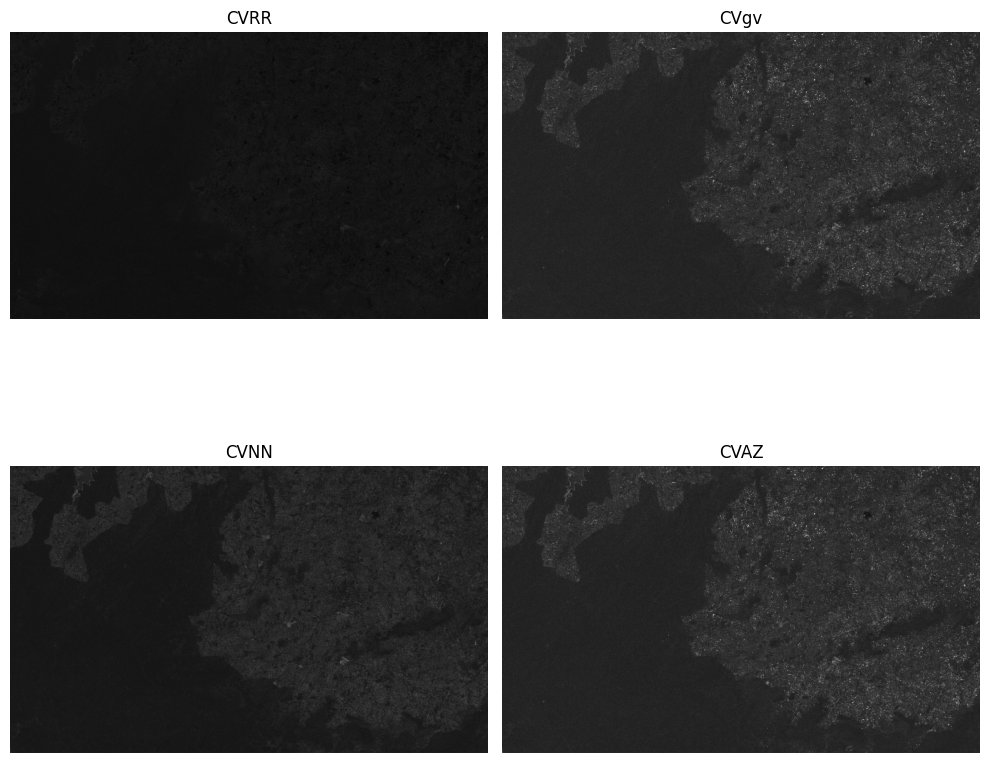

In [26]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0][0].imshow(CVRR, cmap='gray')  # ou sans cmap si RGB
axs[0][0].set_title('CVRR')
axs[0][0].axis('off')

axs[0][1].imshow(CVgv, cmap='gray')  # ou sans cmap si RGB
axs[0][1].set_title('CVgv')
axs[0][1].axis('off')

axs[1][0].imshow(CVVN, cmap='gray')  # ou sans cmap si RGB
axs[1][0].set_title('CVNN')
axs[1][0].axis('off')

axs[1][1].imshow(CVAZ, cmap='gray')  # ou sans cmap si RGB
axs[1][1].set_title('CVAZ')
axs[1][1].axis('off')

plt.tight_layout()
plt.show()

In [27]:
CV1 = np.load(folder_path / "CV1.npy")
CVne1 = np.load(folder_path / "CVne1.npy")
CVnemoins1 = np.load(folder_path / "CVnemoins1.npy")
CV_ne0 = np.load(folder_path / "CV_ne0.npy")

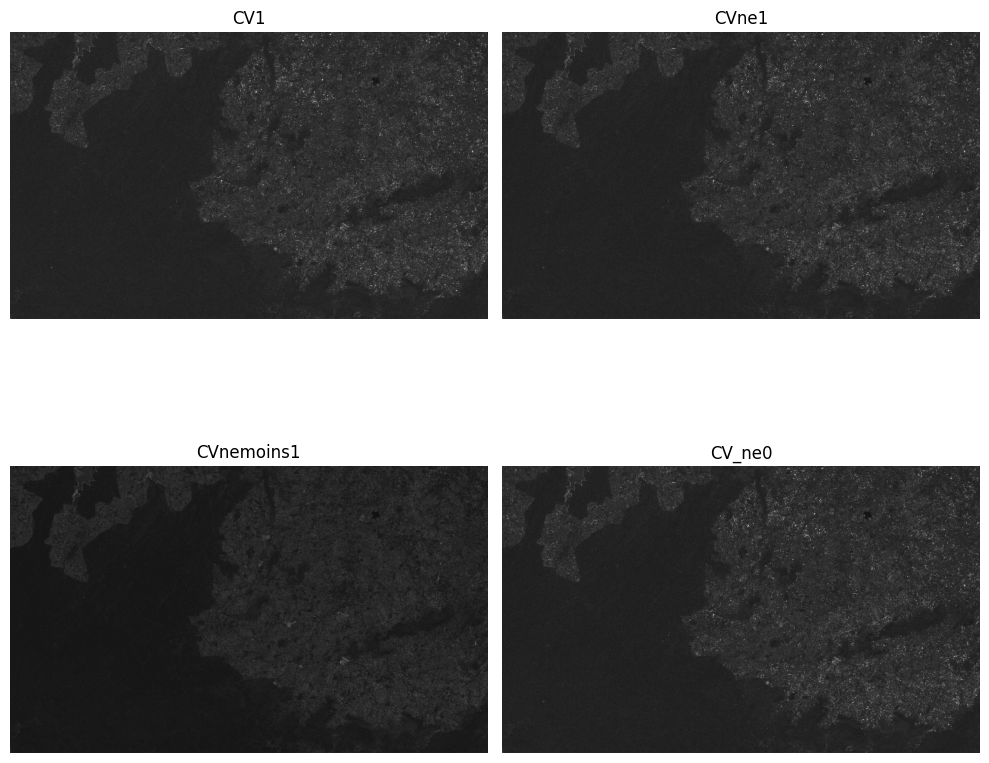

In [28]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0][0].imshow(CV1, cmap='gray')  # ou sans cmap si RGB
axs[0][0].set_title('CV1')
axs[0][0].axis('off')

axs[0][1].imshow(CVne1, cmap='gray')  # ou sans cmap si RGB
axs[0][1].set_title('CVne1')
axs[0][1].axis('off')

axs[1][0].imshow(CVnemoins1, cmap='gray')  # ou sans cmap si RGB
axs[1][0].set_title('CVnemoins1')
axs[1][0].axis('off')

axs[1][1].imshow(CV_ne0, cmap='gray')  # ou sans cmap si RGB
axs[1][1].set_title('CV_ne0')
axs[1][1].axis('off')

plt.tight_layout()
plt.show()

In [32]:
Lmin = np.load(folder_path / "Lmin.npy")
Lmax = np.load(folder_path / "Lmax.npy")

# Replace by our own data
Exx = np.load(DATA_PATH / f'{year}_VH.npy')
Eyy = np.load(DATA_PATH / f'{year}_VV.npy')
print('Size of the Stack: ', 'xx:', np.shape(Exx),'yy:', np.shape(Eyy), )
Nt,nx,ny=np.shape(Exx)

Size of the Stack:  xx: (28, 3109, 5176) yy: (28, 3109, 5176)


<>:5: SyntaxWarning: invalid escape sequence '\l'
<>:8: SyntaxWarning: invalid escape sequence '\l'
<>:5: SyntaxWarning: invalid escape sequence '\l'
<>:8: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_90472/3537305925.py:5: SyntaxWarning: invalid escape sequence '\l'
  axs[0].set_title('$\lambda_{{\min}}$')
/tmp/ipykernel_90472/3537305925.py:8: SyntaxWarning: invalid escape sequence '\l'
  axs[1].set_title('$\lambda_{{\max}}$')


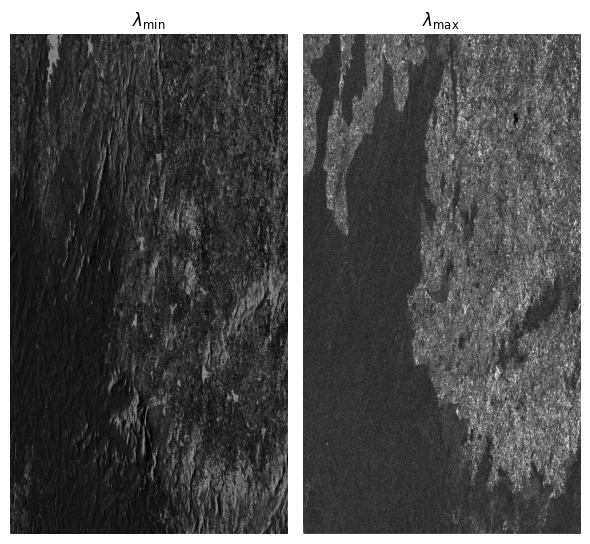

In [38]:

fig, axs = plt.subplots(1, 2, figsize=(6, 12))
p1=1
p2=98
axs[0].imshow(cv2.resize(renormalize_matrix(Lmin,p1,p2),(ny//3,nx), interpolation=cv2.INTER_AREA),cmap='gray')
axs[0].set_title('$\lambda_{{\min}}$')
axs[0].axis('off')
axs[1].imshow(cv2.resize(renormalize_matrix(Lmax,p1,p2),(ny//3,nx), interpolation=cv2.INTER_AREA),cmap='gray')
axs[1].set_title('$\lambda_{{\max}}$')
axs[1].axis('off')
plt.tight_layout()

In [39]:
Lmin2 = np.load(folder_path / "Lmin2.npy")
Lmax2 = np.load(folder_path / "Lmax2.npy")

<>:5: SyntaxWarning: invalid escape sequence '\l'
<>:8: SyntaxWarning: invalid escape sequence '\l'
<>:5: SyntaxWarning: invalid escape sequence '\l'
<>:8: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_90472/2752136726.py:5: SyntaxWarning: invalid escape sequence '\l'
  axs[0].set_title('$\lambda_{{\max}}$ with phase')
/tmp/ipykernel_90472/2752136726.py:8: SyntaxWarning: invalid escape sequence '\l'
  axs[1].set_title('$\lambda_{{\max}}$ incoherent')


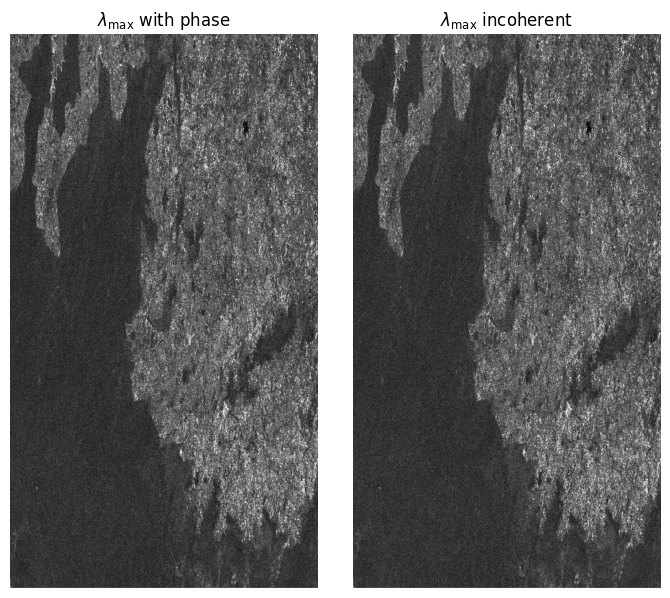

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(7, 6))
p1=1
p2=98
axs[0].imshow(cv2.resize(renormalize_matrix(Lmax,p1,p2),(ny//3,nx), interpolation=cv2.INTER_AREA),cmap='gray')
axs[0].set_title('$\lambda_{{\max}}$ with phase')
axs[0].axis('off')
axs[1].imshow(cv2.resize(renormalize_matrix(Lmax2,p1,p2),(ny//3,nx), interpolation=cv2.INTER_AREA),cmap='gray')
axs[1].set_title('$\lambda_{{\max}}$ incoherent')
axs[1].axis('off')
plt.tight_layout()

In [ ]:
CV_xx, K_xx, Amax_xx = Stack2reactiv(Exx, timeaxis=0, L=1)
rgb_xx = reactiv_image(CV_xx, K_xx, Amax_xx)

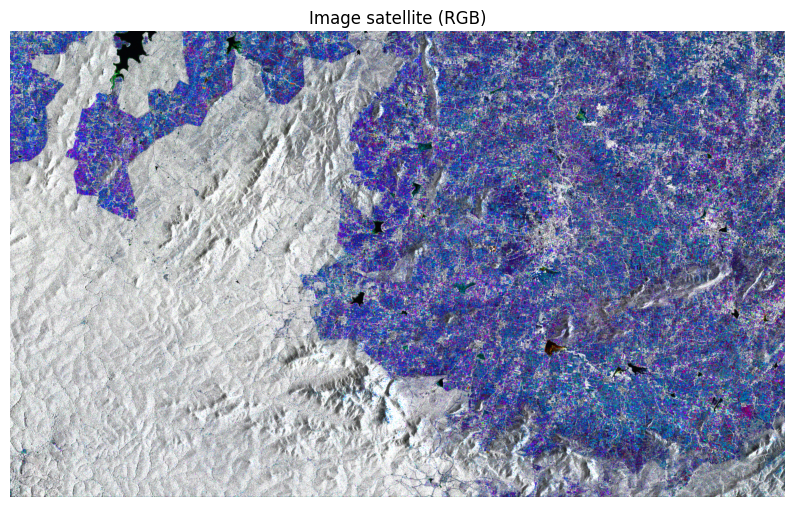

In [ ]:
plt.figure(figsize=(10, 8))
plt.imshow(rgb_xx)  # Pas besoin de cmap si c'est en couleur
plt.title("Image satellite (RGB)")
plt.axis('off')
plt.show()

In [66]:
CV_yy, K_yy, Amax_yy = Stack2reactiv(Eyy, timeaxis=0, L=1)
rgb_yy = reactiv_image(CV_yy, K_yy, Amax_yy)

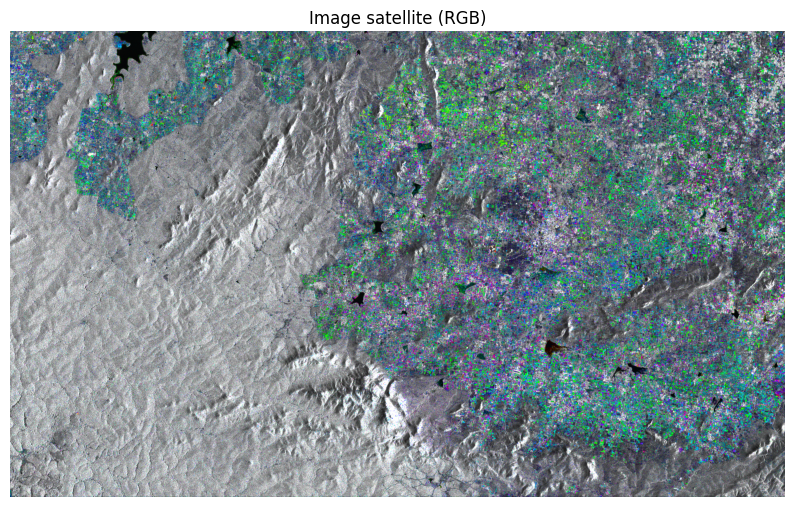

In [67]:
plt.figure(figsize=(10, 8))
plt.imshow(rgb_yy)  # Pas besoin de cmap si c'est en couleur
plt.title("Image satellite (RGB)")
plt.axis('off')
plt.show()